# Assignment 2 Data Classification
Name: Gokul Nithin Kumar Rajakumar
Student ID: 801082252

# Introduction
    The objective of this assignment is to perform classification on the given daatset. This dataset is all about predicting the number of accidents that happened during the period in the city of barcelona.
    It also incorporates the number of mild and serious injuries, the number of vehicles that were resposible for the accident 
    and the point of impact.
    In this dataset there are 15 different features such as
    i. ID
    ii. District Name
    iii. Neighborhood Name
    iv. Street
    v. Weekday
    vi. Month
    vii. Day
    etc....  
    
    
    The following four algorithms have been applied on the dataset.

        Pocket Perceptron Algorithm
        Quadratic Discriminant Analysis
        Linear Discriminant Analysis
        Logistic Regression
    

# Reading the Data

In [1]:
#importing necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from abc import ABC, abstractmethod
%matplotlib inline

In [2]:
#reading the dataset using pandas
df = pd.read_csv("D:\\UNCC\\Sem 2\\Machine Learning\\Assignment 2\\ML Classification\\accidents_2017.csv")
df.head()


,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360885
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365


# Data Preprocessing

In [3]:
#to first get to know the information about all the features in the dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10339 entries, 0 to 10338
Data columns (total 15 columns):
Id                   10339 non-null object
District Name        10339 non-null object
Neighborhood Name    10339 non-null object
Street               10339 non-null object
Weekday              10339 non-null object
Month                10339 non-null object
Day                  10339 non-null int64
Hour                 10339 non-null int64
Part of the day      10339 non-null object
Mild injuries        10339 non-null int64
Serious injuries     10339 non-null int64
Victims              10339 non-null int64
Vehicles involved    10339 non-null int64
Longitude            10339 non-null float64
Latitude             10339 non-null float64
dtypes: float64(2), int64(6), object(7)
memory usage: 1.2+ MB


In [4]:
#To check if there are any null values in the dataset
df.isna().any()

Id                   False
District Name        False
Neighborhood Name    False
Street               False
Weekday              False
Month                False
Day                  False
Hour                 False
Part of the day      False
Mild injuries        False
Serious injuries     False
Victims              False
Vehicles involved    False
Longitude            False
Latitude             False
dtype: bool

## Observation
    Since all are FALSE, there are no samples with null values in them.

In [5]:
df['injury_num'] = np.where(df['Mild injuries'] > 0, 1, -1)

In [6]:
from sklearn.preprocessing import LabelEncoder
lb_make = LabelEncoder()
df["part_of_day_num"] = lb_make.fit_transform(df["Part of the day"])
df["weekday_num"] = lb_make.fit_transform(df["Weekday"])
df["month_num"] = lb_make.fit_transform(df["Month"])
df.head()

,Id,District Name,Neighborhood Name,Street,Weekday,Month,Day,Hour,Part of the day,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude,injury_num,part_of_day_num,weekday_num,month_num
0,2017S008429,Unknown,Unknown,Número 27 ...,Friday,October,13,8,Morning,2,0,2,2,2.125624,41.340045,1,1,0,10
1,2017S007316,Unknown,Unknown,Número 3 Zona Franca / Número 50 Zona Franca ...,Friday,September,1,13,Morning,2,0,2,2,2.120452,41.339426,1,1,0,11
2,2017S010210,Unknown,Unknown,Litoral (Besòs) ...,Friday,December,8,21,Afternoon,5,0,5,2,2.167356,41.360885,1,0,0,2
3,2017S006364,Unknown,Unknown,Número 3 Zona Franca ...,Friday,July,21,2,Night,1,0,1,2,2.124529,41.337668,1,2,0,5
4,2017S004615,Sant Martí,el Camp de l'Arpa del Clot,Las Navas de Tolosa ...,Thursday,May,25,14,Afternoon,1,0,1,3,2.185272,41.416365,1,0,4,8


In [7]:
#to describe the entire dataset and to give the overall view of it.
df.describe()

,Day,Hour,Mild injuries,Serious injuries,Victims,Vehicles involved,Longitude,Latitude,injury_num,part_of_day_num,weekday_num,month_num
count,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000,10339.000000
mean,15.775994,13.811394,1.154174,0.023310,1.178644,1.920979,2.162832,41.399346,0.790695,0.623561,3.053293,5.703550
std,8.763455,5.316490,0.742294,0.163803,0.735145,0.714011,0.024176,0.021251,0.612239,0.681890,2.116404,3.371216
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.091855,41.323094,-1.000000,0.000000,0.000000,0.000000
25%,8.000000,10.000000,1.000000,0.000000,1.000000,2.000000,2.144985,41.386288,1.000000,0.000000,1.000000,3.000000
50%,16.000000,14.000000,1.000000,0.000000,1.000000,2.000000,2.163399,41.396730,1.000000,1.000000,3.000000,6.000000
75%,23.000000,18.000000,1.000000,0.000000,1.000000,2.000000,2.180179,41.411038,1.000000,1.000000,5.000000,9.000000
max,31.000000,23.000000,10.000000,4.000000,10.000000,14.000000,2.222572,41.468244,1.000000,2.000000,6.000000,11.000000


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10339 entries, 0 to 10338
Data columns (total 19 columns):
Id                   10339 non-null object
District Name        10339 non-null object
Neighborhood Name    10339 non-null object
Street               10339 non-null object
Weekday              10339 non-null object
Month                10339 non-null object
Day                  10339 non-null int64
Hour                 10339 non-null int64
Part of the day      10339 non-null object
Mild injuries        10339 non-null int64
Serious injuries     10339 non-null int64
Victims              10339 non-null int64
Vehicles involved    10339 non-null int64
Longitude            10339 non-null float64
Latitude             10339 non-null float64
injury_num           10339 non-null int32
part_of_day_num      10339 non-null int64
weekday_num          10339 non-null int64
month_num            10339 non-null int64
dtypes: float64(2), int32(1), int64(9), object(7)
memory usage: 1.5+ MB


# Visualization of the Data

In [9]:
# to determine the number of accident that happened during which part of the day
Dist_part_day=df['Part of the day'].value_counts().reset_index()
Dist_part_day

,index,Part of the day
0,Afternoon,5082
1,Morning,4067
2,Night,1190


[Text(0,0.5,'No of Accidents'), Text(0.5,0,'Day')]

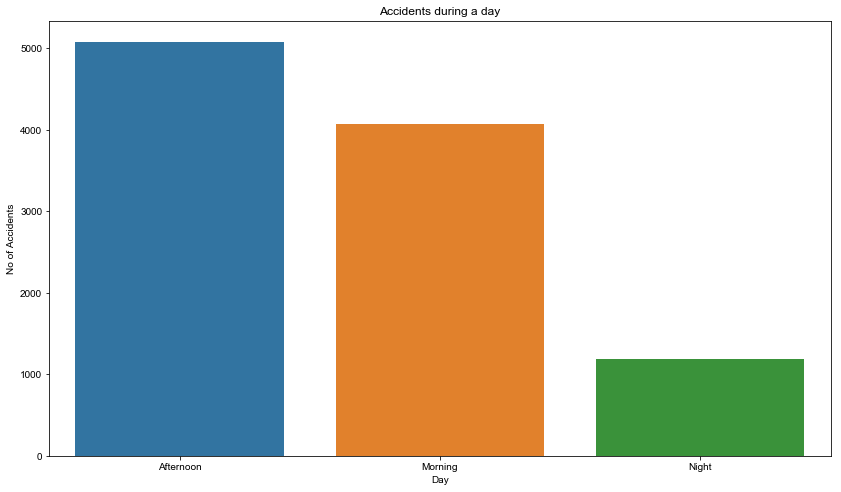

In [10]:
#plotting the graph between part_of_day vs Number of Accidents
plt.figure(figsize=(14,8))
plt.title('Accidents during a day')
sns.set_style(style='darkgrid')
fig=sns.barplot(x="index", y="Part of the day", data=Dist_part_day.sort_values(by=['Part of the day'],ascending=False))
fig.set(xlabel='Day', ylabel='No of Accidents')

## Observation
    Here we could observe that more number of accidents occur during peak time(office hours) ie. during Morning. 

In [11]:
# to determine the number of accident that happened during which week of the month

Dist_weekday=df['Weekday'].value_counts().reset_index()
Dist_weekday

,index,Weekday
0,Friday,1761
1,Tuesday,1691
2,Thursday,1677
3,Wednesday,1650
4,Monday,1510
5,Saturday,1155
6,Sunday,895


[Text(0,0.5,'No of Accidents'), Text(0.5,0,'Week')]

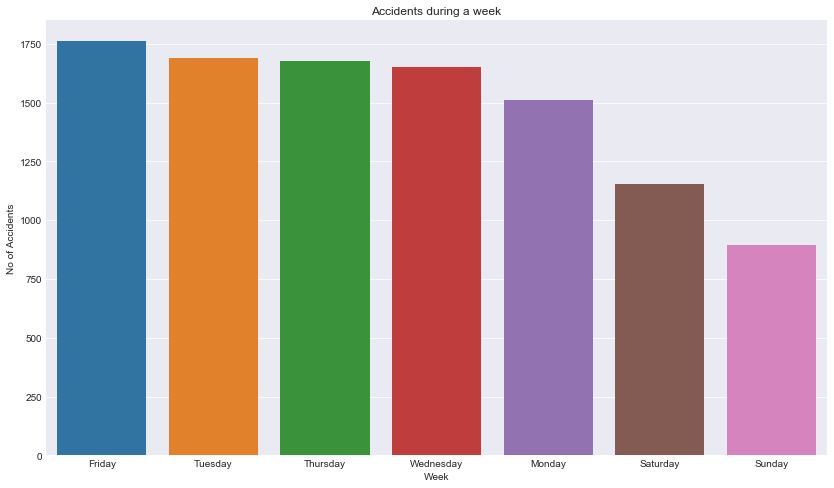

In [12]:
#plotting the graph between week vs Number of Accidents
plt.figure(figsize=(14,8))
plt.title('Accidents during a week')
sns.set_style(style='darkgrid')
fig=sns.barplot(x="index", y="Weekday", data=Dist_weekday.sort_values(by=['Weekday'],ascending=False))
fig.set(xlabel='Week', ylabel='No of Accidents')

## Observation
    Here we could observe that more number of accidents occur during Friday. We could also say that it is due to 
    the start of the weekend that leads to reckless driving of the drivers.

In [13]:
# to determine the number of accident that happened during which month of the year
Dist_month=df['Month'].value_counts().reset_index()
Dist_month

,index,Month
0,November,991
1,May,963
2,March,935
3,October,928
4,July,918
5,June,908
6,April,845
7,January,844
8,February,824
9,September,769


[Text(0,0.5,'No of Accidents'), Text(0.5,0,'Month')]

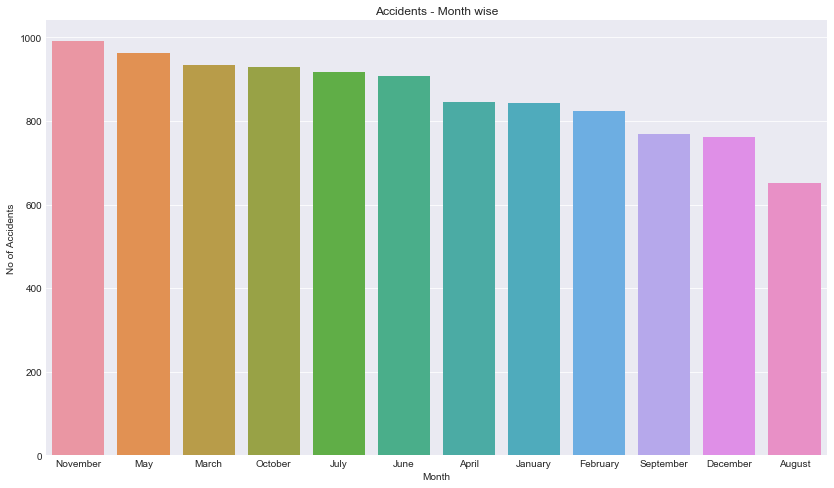

In [14]:
#plotting the graph between month vs Number of Accidents
plt.figure(figsize=(14,8))
plt.title('Accidents - Month wise')
sns.set_style(style='darkgrid')
fig=sns.barplot(x="index", y="Month", data=Dist_month.sort_values(by=['Month'],ascending=False))
fig.set(xlabel='Month', ylabel='No of Accidents')

## Observation
    Here we could observe that more number of accidents occur during November. We could also say that it is due to 
    the start of the thanksgiving holidays and the approaching christmas and new year that leads to reckless driving 
    of the drivers.

In [15]:
# to determine the number of accident that happened during which part of the day
Dist_hour=df['Hour'].value_counts().reset_index()
Dist_hour

,index,Hour
0,14,738
1,13,719
2,18,675
3,15,666
4,19,648
5,16,645
6,9,642
7,17,638
8,12,624
9,8,610


[Text(0,0.5,'No of Accidents'), Text(0.5,0,'Hour')]

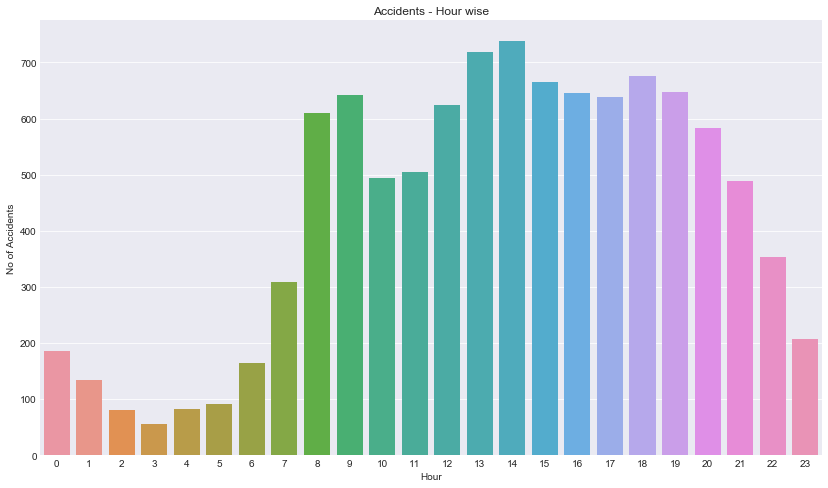

In [16]:
#plotting the graph between part_of_day vs Number of Accidents

plt.figure(figsize=(14,8))
plt.title('Accidents - Hour wise')
sns.set_style(style='darkgrid')
fig=sns.barplot(x="index", y="Hour", data=Dist_hour.sort_values(by=['Hour'],ascending=False))
fig.set(xlabel='Hour', ylabel='No of Accidents')

## Observation
    Here we could observe that more number of accidents occur during peak time(office hours) when the office hours gets over. 

In [17]:
# to determine the number of mild and serious injuries that happened during which part of the day
Dist_injury_day=df[['Part of the day','Mild injuries','Serious injuries']].groupby(['Part of the day']).sum().reset_index()
Dist_injury_day

,Part of the day,Mild injuries,Serious injuries
0,Afternoon,5969,120
1,Morning,4627,79
2,Night,1337,42


[Text(0,0.5,'No of Accidents'), Text(0.5,0,'Day')]

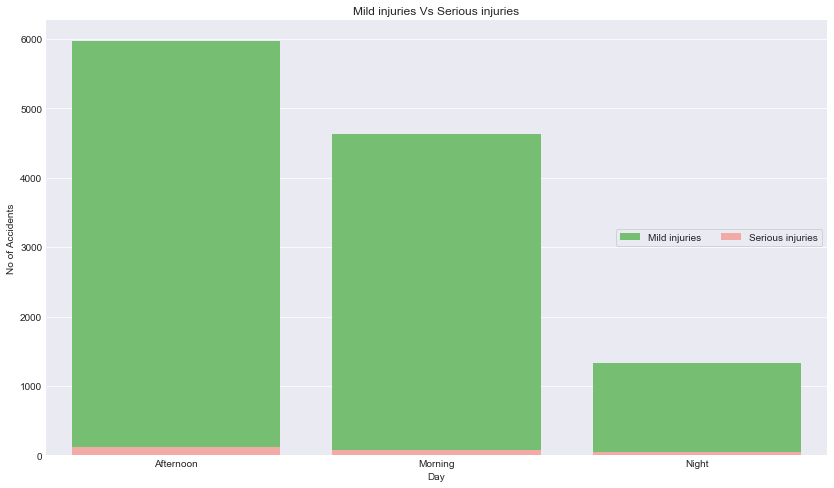

In [18]:
#plotting the graph between mild_injuries vs Number of Accidents and serious_injuries vs Number of Accidents
f, ax = plt.subplots(figsize=(14, 8))

sns.set_color_codes("muted")
sns.set_style(style='darkgrid')
sns.barplot(x="Part of the day", y="Mild injuries", data=Dist_injury_day,label="Mild injuries",color='g')

sns.set_color_codes("pastel")
plt.title('Mild injuries Vs Serious injuries')
sns.set_style(style='darkgrid')
fig=sns.barplot(x="Part of the day", y="Serious injuries", data=Dist_injury_day,label="Serious injuries",color='r')

ax.legend(ncol=2, loc="center right", frameon=True)
sns.despine(left=True, bottom=True)
fig.set(xlabel='Day', ylabel='No of Accidents')

## Observation
    Here we could observe that the number of Mild Injuries is for more than number of number of Serious Injuries. 

In [19]:
# to determine the number of mild and serious injuries that happened during which part of the week
Dist_injury_week=df[['Weekday','Mild injuries','Serious injuries']].groupby(['Weekday']).sum().reset_index()
Dist_injury_week

,Weekday,Mild injuries,Serious injuries
0,Friday,1984,44
1,Monday,1725,27
2,Saturday,1414,33
3,Sunday,1047,39
4,Thursday,1946,33
5,Tuesday,1946,34
6,Wednesday,1871,31


[Text(0,0.5,'No of Accidents'), Text(0.5,0,'Week')]

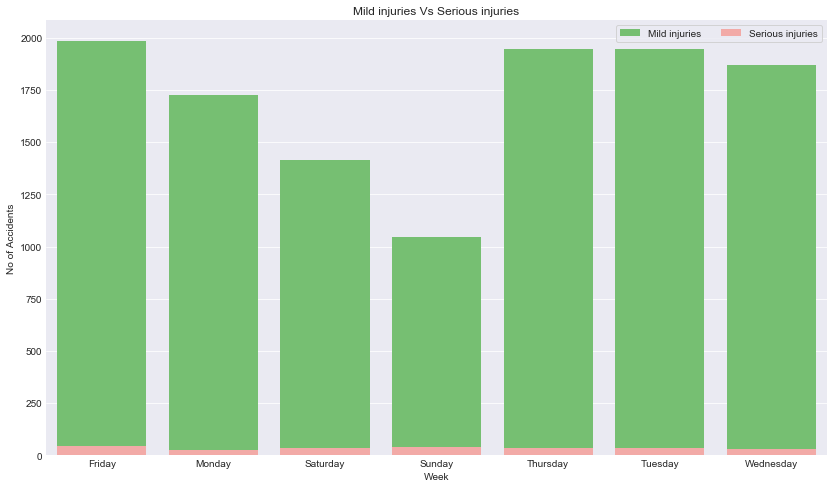

In [20]:
#plotting the graph between mild_injuries vs Number of Accidents and serious_injuries vs Number of Accidents

f, ax = plt.subplots(figsize=(14, 8))

sns.set_color_codes("muted")
sns.set_style(style='darkgrid')
sns.barplot(x="Weekday", y="Mild injuries", data=Dist_injury_week,label="Mild injuries",color='g')

sns.set_color_codes("pastel")
plt.title('Mild injuries Vs Serious injuries')
sns.set_style(style='darkgrid') 
fig=sns.barplot(x="Weekday", y="Serious injuries", data=Dist_injury_week,label="Serious injuries",color='r')

ax.legend(ncol=2, loc="upper right", frameon=True)
sns.despine(left=True, bottom=True)
fig.set(xlabel='Week', ylabel='No of Accidents')

## Observation
    Here we could observe that the number of Mild Injuries is for more than number of number of Serious Injuries.

In [21]:
# to determine the number of mild and serious injuries that happened during which part of the year

Dist_injury_month=df[['Month','Mild injuries','Serious injuries']].groupby(['Month']).sum().reset_index()
Dist_injury_month

,Month,Mild injuries,Serious injuries
0,April,912,23
1,August,793,10
2,December,883,13
3,February,925,17
4,January,975,14
5,July,1079,22
6,June,1067,20
7,March,1071,15
8,May,1063,28
9,November,1172,38


[Text(0,0.5,'No of Accidents'), Text(0.5,0,'Month')]

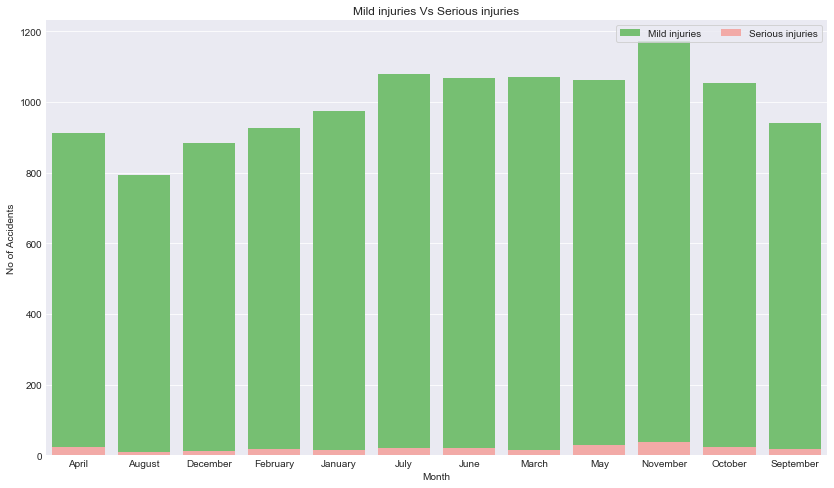

In [22]:
#plotting the graph between mild_injuries vs Number of Accidents and serious_injuries vs Number of Accidents

f, ax = plt.subplots(figsize=(14, 8))

sns.set_color_codes("muted")
sns.set_style(style='darkgrid')
sns.barplot(x="Month", y="Mild injuries", data=Dist_injury_month,label="Mild injuries",color='g')

sns.set_color_codes("pastel")
plt.title('Mild injuries Vs Serious injuries')
sns.set_style(style='darkgrid')
fig=sns.barplot(x="Month", y="Serious injuries", data=Dist_injury_month,label="Serious injuries",color='r')

ax.legend(ncol=2, loc="upper right", frameon=True)
sns.despine(left=True, bottom=True)
fig.set(xlabel='Month', ylabel='No of Accidents')

## Observation
    Here we could observe that the number of Mild Injuries is for more than number of number of Serious Injuries.

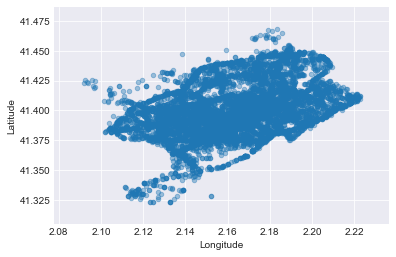

In [23]:
#plotting a scatter plot for lattitude vs Longitude
df.plot(kind="scatter", x="Longitude", y="Latitude", alpha=0.4)
plt.show()

## Observation
    Here we could observe that more number of accidents has occured in the places ranging from Latitude: 41.37 - 41.42
    and longitude: 2.1 - 2.2

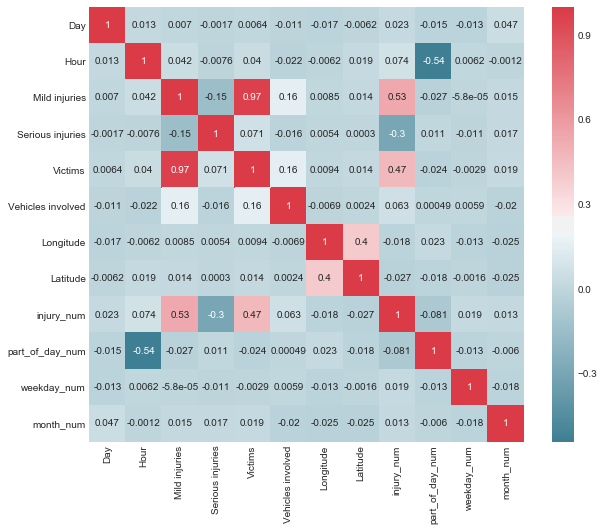

In [24]:
#creating a heat map for the entire dataset to depict the relation and association between the features.
f, ax = plt.subplots(figsize=(10, 8))
corr = df.corr()
sns.heatmap(corr, mask=np.zeros_like(corr, dtype=np.bool), cmap=sns.diverging_palette(220, 10, as_cmap=True),square=True, ax=ax,annot= True)

# Partitioning
    Before applying the classifiers on the data we must first partition the dataset in the ratio 20:80, providing 20% to testing data and the rest 80% to training data. Finally we are going to classify whether the injury to the person during the accident is mild or serious. 

In [25]:
df = df.loc[:, ~df.columns.isin(['Id','District Name','Neighborhood Name','Street','Weekday','Month','Part of the day','Mild injuries','Serious injuries','Longitude','Latitude'])]

X2 = df.iloc[:,df.columns != 'injury_num']

T = df.iloc[:,df.columns == 'injury_num']

X2 = X2.values
T = T.values

In [26]:
# now partition the data 

""" partitioning data

    parameters
    -----------
    X        pd.DataFrame
             input data to partition
    T        pd.DataFrame
             target labels to partition
    raito    list
             list of ratios for partitions (should be summed to 1) 
             the number of return pairs are different
"""
def partition(X, T, ratio=[0.8, 0.2]): 
    
    assert(np.sum(ratio) == 1)
    
    # shuffle the data indices 
    idxs = np.random.permutation(X.index)
    
    # the number of samples 
    N = X.shape[0]
    
    Xs = []
    Ts = []
    i = 0  
    for k, r in enumerate(ratio):
        nrows = int(round(N * r)) 
        
        if k == len(ratio) -1:
            Xs.append(X.iloc[i:, :])
            Ts.append(T.iloc[i:, :])
        else:
            Xs.append(X.iloc[i:i+nrows, :])
            Ts.append(T.iloc[i:i+nrows, :])
        
        i += nrows
    
    return Xs, Ts

In [27]:
Xlst, Tlst = partition(pd.DataFrame(X2), pd.DataFrame(T))

Xtrain, Xtest = [xx.as_matrix() for xx in Xlst]
Ytrain, Ytest = [tt.as_matrix() for tt in Tlst]

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:3: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  This is separate from the ipykernel package so we can avoid doing imports until
D:\Anaconda\lib\site-packages\ipykernel_launcher.py:4: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  after removing the cwd from sys.path.


# Super Class
    Below is the super class definition for the machine learning models. To Standardise the input we must first normalize the data. The isinstance() returns true if the object is of the specified type. The addones() is used to add bias to input matrix X. and finally confusion_matrix() to calculate the accuracy of the learning model.
    The confusion matrix calculates the accuracy with the help of the following equation-
                    classification_accuracy= (TP+TN)/(TP+TN+FP+FN) * 100
                        where,
                            TP: true positive
                            TN: true negative
                            FP: false positive
                            FN: false negative

In [28]:
import numpy as np
from abc import ABC, abstractmethod

# Super class for machine learning models 

class BaseModel(ABC):
    """ Super class for ITCS Machine Learning Class"""
    
    @abstractmethod
    def train(self, X, T):
        pass

    @abstractmethod
    def use(self, X):
        pass

    

class Classifier(BaseModel):
    """
        Abstract class for classification 
        
        Attributes
        ==========
        meanX       ndarray
                    mean of inputs (from standardization)
        stdX        ndarray
                    standard deviation of inputs (standardization)
    """

    def _init_(self, ):
        self.meanX = None
        self.stdX = None

    def normalize(self, X):
        """ 
            To Standardize the input X 
        """
    
        # The isinstance() returns True if the object is of the specified type.
        # numpy.array is a function that returns a numpy.ndarray. The type of the numpy array is numpy.ndarray            
        if not isinstance(X, np.ndarray): 
            
            # asarray always returns an ndarray. 
            # asanyarray will return a subclass of ndarray if that is what was passed to it
            X = np.asanyarray(X)
            
        #axis = 0 means along the column and axis = 1 means working along the row
        self.meanX = np.mean(X, 0)
        self.stdX = np.std(X, 0)
        
        Xs = (X - self.meanX) / self.stdX
        return Xs

    def _check_matrix(self, mat, name):
        if len(mat.shape) != 2:
            raise ValueError(''.join(["Wrong matrix ", name]))
        
    # add a basis
    def add_ones(self, X):
        """
            add a column basis to X input matrix
        """
        self._check_matrix(X, 'X')
        return np.hstack((np.ones((X.shape[0], 1)), X))

    def confusion_matrix(self,Y,T):
        """
        Y    ndarray
             predicted labels
        T    ndarray
             target labels
             
        @cfm DataFrame
             confusion matrix
        """
    
        if len(Y) != len(T):
            raise ValueError("Wrong prediction and target length!")
    
        classes = np.unique(T) # Finding unique elements in T

        
        n_classes = len(classes) # Finding count of unique elements

    
        cfm = pd.DataFrame(np.zeros((n_classes, n_classes)), index=classes, columns=classes, dtype=int)

    
        Tidx = [T == c for c in classes]

        for c in classes:
            pred_idx = Y == c
            cfm.loc[c, :] = [np.sum(np.logical_and(pred_idx, tidx)) for tidx in Tidx]  

        return cfm
    
    def precision(self,cfm):
        return cfm[1][1]/(cfm.sum(axis=1)[1])
    
    def recall(self,cfm):
        return cfm[1][1]/(cfm.sum(axis=0)[1])
    
    def specificity(self,cfm):
        return cfm[-1][-1]/(cfm.sum(axis=0)[-1])
    
        

    @abstractmethod
    def train(self, X, T):
        pass
    
    @abstractmethod
    def use(self, X):
        pass

# Pocket Algorithm

The pocket algorithm keeps the best result seen so far in its pocket. The best result means the number of misclassifications is minimum. If the new weights produce a smaller number of misclassification than the weights in the pocket or in other words if the new weights produce a larger number of proper classification than the weights in the pocket, then replace the weights in the pocket with the new weights; if the new weights are not better than the one in the pocket, keep the one in the pocket and discard the new weights. At the end of the training iteration, the algorithm returns the solution in the pocket, whose weights have the least number of misclassifications.

For the case of misclassification, the positive class example  $\xv_i$, 

$$
y_i = \wv^{(k)} \xv_i < 0.
$$

To fix this classification error, we want to update the weight $\wv^{(k)}$ to increase the output $y_i$.
Thus, we expect

$$
 \wv^{(k+1)} \xv_i >  \wv^{(k)} \xv_i.
$$

This can be reached by using $\xv_i$ as a gradient as follows: 

$$
\wv^{(k+1)} = \wv^{(k)} + \alpha \xv_i
$$

where $\alpha$ is the learning rate. 

When the sample $t_i$ is negative, we need to do the opposite

$$
 \wv^{(k+1)} \xv_i <  \wv^{(k)} \xv_i.
$$

To combine both positive and negative cases, we can use the target sample $t_i$ in our update, 

$$
\wv^{(k+1)} = \wv^{(k)} + \alpha t_i \xv_i
$$

When the data is not linearly separable, there is no guarantee on convergence. Thus, for training, we need to set the maximum number of iteration. Also, the algorithm selects an arbitrary hyperplane that divides two classes, so it is possible to discover a decision boundary that is not the best.To overcome this uncertainity we have used the pocket algorithm which is an extension of the percepton algorithm.

In pocket algorithm instead of processing all the elements it processes elements in the dataset one at a time. Then it updates the weight and compares with the previous weight and the best weight is stored in the pocket. Thus the  $w_{pocket}$ will contain the best solution so far.

## Code Explanation

    The compare() finds an element-wise indication of the sign of a number and then returns 1 if the more number of y values are equal to T values when compared with yp values. In general compare() method returns 1 if w is better -1 if wp is better. To update the best solution in the pocket, initially permute a random sequence.Then check if the signs of the predicted and target values are same. If not then adjust the weights to fix it. If np.sign(y) != np.sign(T[k]), means that there is a classification error and in order to fix it update the weight w(k) using target sample. And finally the use() returns the weight the gives the best classification result.

In [29]:
from copy import deepcopy as copy 

class PocketAlgorithm(Classifier):
    """
        Pocket Algorithm class 
        
        Attributes
        ==========
        w_pocket    ndarray
                    weight vector/matrix
        aplha       float
                    Learning rate
    """
    alpha =0.07
    def _init_ (self,alpha):
        Classifier._init_(self)
        
        """
            pocket weight vector w_pocket is initialized as None
        """
        self.w_pocket = None        
        
        self.alpha = alpha # Learning rate
        
   
    def compare(self, X, T, w , wp):
        
        y = np.sign(X @ w)
        
        yp = np.sign(X @ wp)
    
        return 1 if np.sum(y == T) >= np.sum(yp == T) else -1
    
    def train(self, X, T):  
        
        maxiter = 1000
        
        Xs = self.normalize(X)  # Normalize X      
        X1 = self.add_ones(Xs)  # Adding bias
        
        N = X1.shape[0]        

        w = np.zeros(X1.shape[1]) 
        self.w_pocket = copy(w) 
            
        for i in range(maxiter):
            
            converged = True
            
            for k in np.random.permutation(N):                
               
                y = w @ X1[k]  
                
                if np.sign(y) != np.sign(T[k]):
                    

                    w += self.alpha * T[k] * X1[k]
                    converged = False 
        
                    
                    if self.compare(X1, T, w, self.w_pocket) > 0:
                        self.w_pocket[:] = w[:] 
                        
            if converged:      
                break
                
    
    def use(self, X):
        
        
        Xs = self.normalize(X)  # Normalize X      
        X1 = self.add_ones(Xs)  
        Y = X1 @ self.w_pocket
        return np.sign(Y)

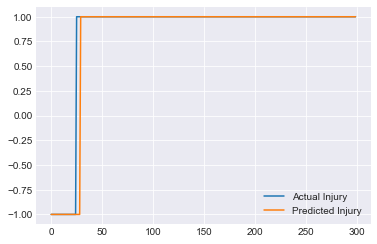

In [30]:
classify = PocketAlgorithm()
classify.train(Xtrain[:200], Ytrain[:200])
predict = classify.use(Xtest[:300])
plt.clf()
plt.plot(np.sort(predict,0), label ='Actual Injury')
plt.plot(np.sort(Ytest[:300],0), label = 'Predicted Injury')
plt.legend()
plt.show()

In [31]:
confusion = classify.confusion_matrix(predict,Ytest[:300])
print("\n Confusion Matrix: \n",confusion)

precision = classify.precision(confusion)
print("\n Precision: ",precision)

recall = classify.recall(confusion)
print("\n Recall: ",recall)

specificity = classify.specificity(confusion)
print("\n Specificity: ",specificity)

accuracy = ((confusion[-1][-1] + confusion[1][1])*100)/ (confusion[-1][-1] + confusion[1][1] + confusion[-1][1] + confusion[1][-1])
print("\n Accuracy(%): ", accuracy)


 Confusion Matrix: 
       -1      1
-1   725   6775
 1  7975  74525

 Precision:  0.9033333333333333

 Recall:  0.9166666666666666

 Specificity:  0.08333333333333333

 Accuracy(%):  83.61111111111111


# QDA

When we have a binary classification problem, $k \in \{-1, +1\}$, we have a higher posterior probability $P(T = +1 \mid \xv)$ for the sample $\xv$ with the positive label. Thus, 

$$
P(T = +1 \mid \xv) > P(T = -1 \mid \xv).
$$

The inequality will be the opposite in case of the negative samples. 

To build our model to meet this expectation, we need to apply algebric transformations using inequality amd gaussian assumptions.  and then by applying log and removing exponential component we get:

$$
-\frac{1}{2} \ln \vert \boldsymbol\Sigma_+ \vert - \frac{1}{2} (\xv - \boldsymbol\mu_+)^\top \boldsymbol\Sigma_+^{-1} (\xv - \boldsymbol\mu_+) + \ln P(T = +1) > -\frac{1}{2} \ln \vert \boldsymbol\Sigma_- \vert - \frac{1}{2} (\xv - \boldsymbol\mu_-)^\top \boldsymbol\Sigma_-^{-1} (\xv - \boldsymbol\mu_-) + \ln P(T = -1)
$$

From the observation that both terms have the same cosmetics, we can define the discriminant function $\delta_k(\xv)$ as

$$
\delta_k(\xv) = -\frac{1}{2} \ln \vert \boldsymbol\Sigma_k \vert - \frac{1}{2} (\xv - \boldsymbol\mu_k)^\top \boldsymbol\Sigma_k^{-1} (\xv - \boldsymbol\mu_k) + \ln P(T = k). 
$$

Now, for a new sample $\tilde{\xv}$, we can predict the label with

$$
y = \arg\max_k \delta_k(\tilde{\xv}). 
$$

The decision boundary is placed where the discriminant functions meet such as $\delta_1 == \delta_2$.

## Code Explanation
    First get the number of samples by using row count of input matrix/vector. Then iterate through the unique values in T i.e. through the target classes in data.Test whether each element of target data is similar with the class value and then check how many values in T are same as current unique value of T. Check all the true instances that resulted in comparison and find the probability by diving with samples count by appending the resulting P(T=k) value to the prior array.Estimate the covariance on the resultant dot product the Xs[contains] matrix and T and append the current step sigma to global sigma. In the use(), iterate through the count of unique values in T i.e. through the target classes in data and append it to the discriminant function.


In [32]:
from mpl_toolkits.mplot3d import Axes3D
class QDA(Classifier):
    """ 
        Quadratic Discriminant Analysis         
             
    """
    def _init_(self):
        Classifier._init_(self)
    
    def train(self, X, T):
        
        self.prior = []  
        self.sigma = []  
        self.mu = []  
        Xs = self.normalize(X)
        N = Xs.shape[0]
        self.classes = np.unique(T) 
        for i in (self.classes):
            contains = np.where(T == i)[0]
            self.prior.append(len(contains)/N) 
            if contains.any():
                sigma1 = np.cov(Xs[contains].T) 
                self.sigma.append(copy(sigma1))
                mu1 = Xs[contains].mean(0)  
                self.mu.append(copy(mu1))                
                 

    def use(self,X):
        self.d = []        
        Xs = self.normalize(X)
        for k in range(len(self.classes)):
            D = Xs.shape[1]
            detSigma = self.sigma[k] if D == 1 else np.log(np.linalg.det(self.sigma[k]))
            diff = Xs - self.mu[k].T 
            sigmaI = 1.0/self.sigma[k] if D == 1 else np.linalg.inv(self.sigma[k])
            self.d.append(-0.5 * detSigma - 0.5 * np.sum(np.dot(diff,sigmaI)*diff, axis= 1) + np.log(self.prior[k]))
        return self.d

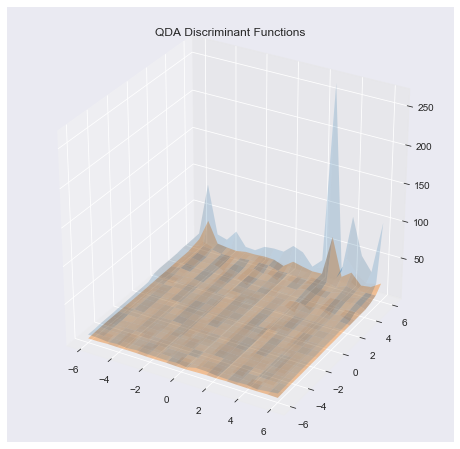

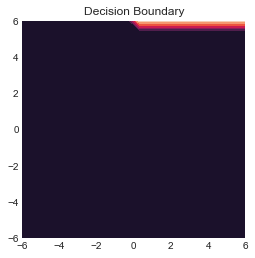

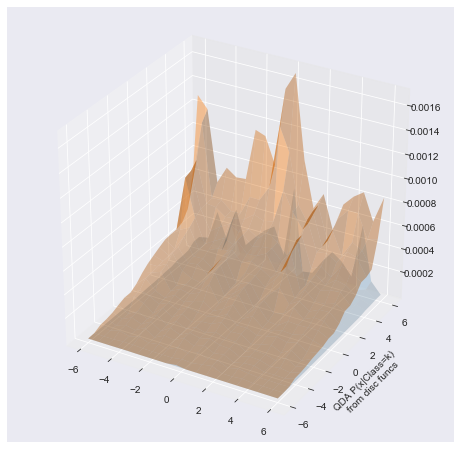


 D:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1
 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

 Output:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [33]:
classify = QDA()


classify.train(Xtrain[:500], Ytrain[:500])

predict = classify.use(Xtest[:400])


xs, ys = np.meshgrid(np.linspace(-6,6,20), np.linspace(-6,6,20))

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, np.sort(-1 * predict[0].reshape(xs.shape),0), alpha = 0.2)
ax.plot_surface(xs, ys, np.sort(-1 * predict[1].reshape(xs.shape),0), alpha = 0.4)
plt.title("QDA Discriminant Functions")


plt.figure(figsize=(4,4))
plt.contourf(xs, ys, (np.sort(predict[0]- predict[1], 0)>0).reshape(xs.shape))
plt.title("Decision Boundary")
plt.show()

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
prob1 = np.exp( np.sort(predict[0].reshape(xs.shape),0) - 0.5* Xtrain.shape[1]* np.log(2*np.pi) - np.log(classify.prior[0]))
prob2 = np.exp( np.sort(predict[1].reshape(xs.shape),0) - 0.5* Xtrain.shape[1]* np.log(2*np.pi) - np.log(classify.prior[1]))
ax.plot_surface(xs, ys, prob1, alpha=0.2)
ax.plot_surface(xs, ys, prob2, alpha=0.4)
plt.ylabel("QDA P(x|Class=k)\n from disc funcs", multialignment="center")
plt.show()

D = np.argmax(predict, axis=0)
print("\n D: ", D)

output = [classify.classes[t] for t in D]
print("\n Output: ", output)

confusion = classify.confusion_matrix(output,Ytest[:400])
print("\n Confusion Matrix: \n",confusion)

precision = classify.precision(confusion)
print("\n Precision: ",precision)

recall = classify.recall(confusion)
print("\n Recall: ",recall)

specificity = classify.specificity(confusion)
print("\n Specificity: ",specificity)



accuracy = ((confusion[-1][-1] + confusion[1][1])*100)/ (confusion[-1][-1] + confusion[1][1] + confusion[-1][1] + confusion[1][-1])
print("\n Accuracy(%): ", accuracy)


# LDA

Maintaining covariance matrix for each class is not cheap and also, the data is undersampled, which leads the resulting class boundary to have high chance of overfitting. To overcome the above problem and to use the same covariance for all the classes, we have come up with the **linear discriminant analysis** model. 
Let $\boldsymbol\Sigma_k = \boldsymbol\Sigma$. 


$$
\begin{align*}
\delta_+(\xv) &> \delta_-(\xv) \\ 
 \xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_+ -\frac{1}{2} \boldsymbol\mu_+^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_+ + \ln P(T = +1) &>  \xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_- - \frac{1}{2}\boldsymbol\mu_-^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_-  + \ln P(T = -1)
\end{align*}
$$


Unifying the covariance matrix, we can remove the quadratic term in our disciriminant function: 

$$
\delta_k(\xv) = \xv^\top \boldsymbol\Sigma^{-1} \boldsymbol\mu_+ -\frac{1}{2} \boldsymbol\mu_+^\top \boldsymbol\Sigma^{-1}\boldsymbol\mu_k + \ln P(T = k).
$$

In many cases, for simple computation, the covariance matrix $\boldsymbol\Sigma$ is chosen as an average of all the covariance matrices for all classes,

$$
\boldsymbol\Sigma = \sum_k^K \frac{N_k}{N} \boldsymbol\Sigma_k.
$$

## Code Explanation
    In the train(), we first initiaize the prior, covariance matrix, mean vector,estimate the covariance on the resultant dot product the Xs matrix and T. Then iterate through the unique values of T i.e. through the target classes in data. Then test whether each element of a 1-D array is also present in a second array.Check all the true instances that resulted in comparison and find the probability by diving with samples count. and finaly append the current step mu to global mu. In the use(), iterate through the count of unique values in T i.e. through the target classes in data and append it to the discriminant function.

In [34]:
from mpl_toolkits.mplot3d import Axes3D
class LDA(Classifier):
    """ 
        Quadratic Discriminant Analysis         
             
    """
    def _init_(self):
        Classifier._init_(self)
    
    def train(self, X, T):
        self.prior = []  
        self.sigma = [] 
        self.mu = []
        Xs = self.normalize(X)
        N = Xs.shape[0]
        self.sigma = np.cov(Xs.T)      
        self.classes = np.unique(T)  
        for i in self.classes:
            contains = np.where(T == i)[0]
            self.prior.append(len(contains)/N) 
            if contains.any(): 
                mu1 = Xs[contains].mean(0)                 
                self.mu.append(copy(mu1))  
                
    def use(self,X):
        self.d = [] 
        Xs = self.normalize(X)
        for j in range(len(self.classes)):
            D = Xs.shape[1]
            detSigma = self.sigma if D == 1 else np.log(np.linalg.det(self.sigma))          
            diff = Xs - self.mu[j].T 
            sigmaI = 1.0/self.sigma if D == 1 else np.linalg.inv(self.sigma)
            self.d.append(np.sum(np.dot(X, sigmaI)*self.mu[j] - 0.5 * np.dot(self.mu[j],sigmaI)*self.mu[j] + np.log(self.prior[j]), axis =1))   
        return self.d


 Predicted Value: 
 [array([-25.13025621, -24.43535785, -22.81438335, -22.75450087,
       -22.36771499, -20.09283405, -25.31401392, -22.6547773 ,
       -22.981495  , -22.57094292, -23.98183451, -26.61964348,
       -23.00283772, -22.93731601, -24.84172778, -23.70737769,
       -23.75200841, -21.8594359 , -21.9007968 , -22.00523114,
       -20.09182928, -23.15117868, -21.08992041, -21.79277513,
       -21.12349005, -20.7563347 , -22.35761863, -22.80197615,
       -22.67903559, -23.85256916, -22.19538167, -25.24887818,
       -21.55906907, -24.98181402, -23.21631382, -19.82344068,
       -22.41663365, -19.98543583, -21.65407251, -22.9726024 ,
       -22.99623418, -20.28819081, -21.5586899 , -25.11910733,
       -21.50108083, -22.51010856, -21.68740604, -22.86186798,
       -20.71312938, -22.65147881, -20.75325668, -23.00277607,
       -21.61868708, -24.2662327 , -21.21103039, -22.21864364,
       -21.8239149 , -21.60814535, -20.86054443, -19.83841333,
       -23.66713871, -24.00375629

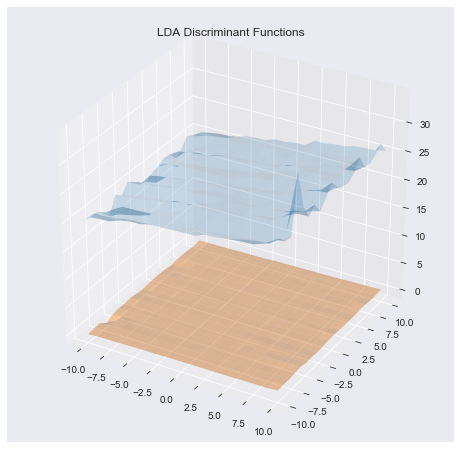

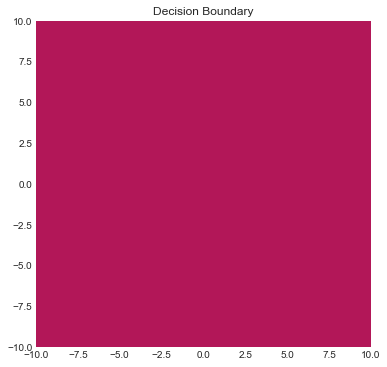

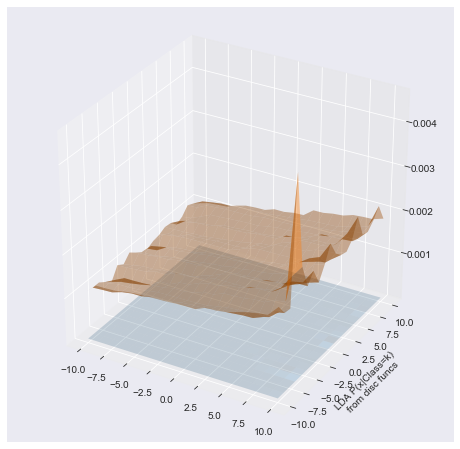


 D:  [1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1]

 Output:  [1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,

In [35]:
classify = LDA()

classify.train(Xtrain[:500], Ytrain[:500])

predict = classify.use(Xtest[:400])
print("\n Predicted Value: \n", predict)

xs, ys = np.meshgrid(np.linspace(-10,10, 20), np.linspace(-10,10, 20))
fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
ax.plot_surface(xs, ys, np.sort(-1 *predict[0].reshape(xs.shape)), alpha=0.2)
ax.plot_surface(xs, ys, np.sort(-1 *predict[1].reshape(xs.shape)), alpha=0.4)
plt.title("LDA Discriminant Functions")

plt.figure(figsize=(6,6))
plt.contourf(xs, ys, (np.sort(predict[0]-predict[1]) > 0).reshape(xs.shape))
plt.title("Decision Boundary")

fig = plt.figure(figsize=(8,8))
ax = fig.gca(projection='3d')
prob1 = np.exp( np.sort(predict[0].reshape(xs.shape)) - 0.5*Xtrain.shape[1]*np.log(2*np.pi) - np.log(classify.prior[0]))
prob2 = np.exp( np.sort(predict[1].reshape(xs.shape)) - 0.5*Xtrain.shape[1]*np.log(2*np.pi) - np.log(classify.prior[1]))
ax.plot_surface(xs, ys, prob1, alpha=0.2)
ax.plot_surface(xs, ys, prob2, alpha=0.4)
plt.ylabel("LDA P(x|Class=k)\n from disc funcs", multialignment="center")
plt.show()

D = np.argmax(predict, axis=0)
print("\n D: ", D)

output = [classify.classes[t] for t in D]
print("\n Output: ", output)

confusion = classify.confusion_matrix(output,Ytest[:400])
print("\n Confusion Matrix: \n",confusion)

precision = classify.precision(confusion)
print("\n Precision: ",precision)

recall = classify.recall(confusion)
print("\n Recall: ",recall)

specificity = classify.specificity(confusion)
print("\n Specificity: ",specificity)



accuracy = ((confusion[-1][-1] + confusion[1][1])*100)/ (confusion[-1][-1] + confusion[1][1] + confusion[-1][1] + confusion[1][-1]) 
print("\n Accuracy(%): ", accuracy)


# Logistic Regression

Previously we discussed about using least squres to fit on the discrete target for classification.
When dealing with multiple classes, it can cause masking problem that one class estimation is masked by other predictions. 

Now, we consider a linear regression model that directly predicts $P(T=k \mid \xv)$, not the class label $k$. 
We call this approach as **Logistic Regression**. 

Again, let us use the same linear model for regression: 

$$
\kappa = f(\xv ; \wv) = \Xm \wv.
$$

Thus,

$$
P(T=k \mid \xv) = h(\Xm \wv) = h(\kappa) = \yv.
$$
#### Gradient Descent

The weight has to be updated $\wv$ with the gradient:

$$
\wv \leftarrow \wv - \alpha \nabla_\wv E(\wv).
$$
with the learning rate $\alpha$. 

#### Softmax Transformation

Before computing the derivative, let us select the function $h(\cdot)$. 

Since $P(T=k \mid \xv)$ is probability function, it satisfies 

- the outputs are non-negative,

- the integral of the probability is one.

$$
g_k(\xv) = P(T=k \mid \xv) = \frac{e^{\kappa_k}}{\sum_{c=1}^K e^{\kappa_c}}
$$

This function is called as **softmax function**. This generalizes the logistic sigmoid fuunction and the derivatives are given by itself

$$
\frac{\partial g_k}{\partial y_j}  = g_k (I_{kj} - g_j).
$$

The error function for Logistic Regression is defined as:
$$
E(\wv) = - \ln P(\Tm \mid \wv) =  - \sum_{n=1}^{N} \sum_{k=1}^{K} t_{n,k} \ln y_{n,k}.
$$
It is also called *cross-entropy* error function.

Applying Gradient Descent on this error function:
$$
\wv_j \leftarrow \wv_j + \alpha \Xm^\top \Big(  t_{*,j} - g_j(\Xm)\Big).
$$

## Explanation of Code

    In the softmax() the softmax is calculated for the logistic regression. In the train() as discussed above, the learning rate is set and generates the weights for a number of iterations.The softmaxdot() calculates the dot product of X and w. And similarly the use() uses the weights to calculate probability for each class and returns class with highest probability.

In [36]:
class LogisticRegression(Classifier): 
    """ 
        Logistic Regression class 
        
        attributes
        ===========
        w_pocket    ndarray
                    weight vector/matrix
        aplha       float
                    Learning rate        
    """
    alpha=0.1
    def _init_(self,alpha):
        Classifier._init_(self)
        
        """
            weight vector w is initialized as None
        """
        self.w = None
        self.alpha = alpha 
    
    def softmax(self,z):
        if not isinstance(z, np.ndarray):
            z = np.asarray(z)
        f = np.exp(z) 
        return f / (np.sum(f, axis=1, keepdims=True) if len(z.shape) == 2 else np.sum(f))

    def g(self,X, w):
        return self.softmax(X @ w) 
        
    def train(self, X, T):
        niter = 10
        Xs = self.normalize(X)
        X1 = self.add_ones(Xs)
        self.classes = np.unique(T) 
        K = len(self.classes) 
        N = X1.shape[0]         
        D = X1.shape[1] 
        self.w = np.random.rand(D, K)
        T = self.add_ones(T.reshape(-1,1))
        for step in range(niter):
                ys = self.g(X1,self.w)
                self.w += self.alpha * X1.T @ (T - ys)   
                
    def use(self, X):
        
        Xs = self.normalize(X) 
        X1 = self.add_ones(Xs)
        return self.g(X1, self.w)

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:26: RuntimeWarning: invalid value encountered in true_divide



 X_test:  [ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29 30 31]

 Y:  [[4.81134767e-08 9.99999952e-01]
 [6.11054029e-11 1.00000000e+00]
 [1.00000000e+00 9.65598001e-19]
 [5.00002179e-02 9.49999782e-01]
 [1.00000000e+00 8.08414420e-19]
 [8.44005710e-01 1.55994290e-01]
 [1.00000000e+00 7.73742187e-14]
 [1.00000000e+00 3.91433009e-20]
 [1.00000000e+00 4.38962072e-20]
 [1.00000000e+00 8.38130858e-25]
 [9.99779756e-01 2.20244171e-04]
 [9.36626905e-14 1.00000000e+00]
 [1.00000000e+00 8.43706589e-21]
 [1.00000000e+00 2.17684516e-23]
 [1.00000000e+00 2.75931975e-20]
 [9.99994728e-01 5.27167540e-06]
 [1.00000000e+00 7.53987532e-17]
 [1.00000000e+00 1.68569173e-24]
 [9.98243650e-01 1.75635043e-03]
 [5.28241130e-16 1.00000000e+00]
 [9.91684201e-01 8.31579946e-03]
 [5.65929281e-12 1.00000000e+00]
 [1.29178516e-01 8.70821484e-01]
 [3.99544686e-02 9.60045531e-01]
 [1.00000000e+00 8.84257956e-17]
 [9.91587266e-01 8.41273420e-03]
 [1.00000000e+00 2.6891030

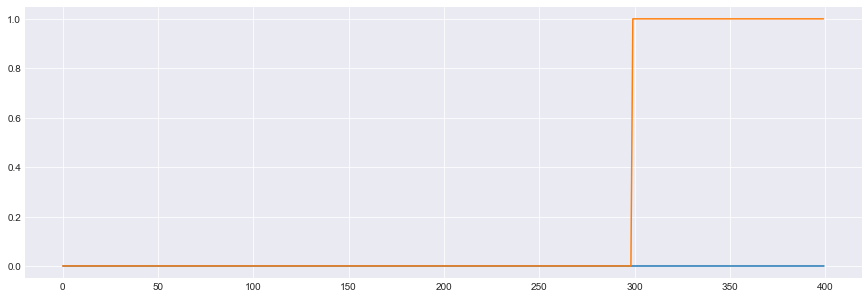


 Output:  [-1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, -1, 

D:\Anaconda\lib\site-packages\ipykernel_launcher.py:99: RuntimeWarning: invalid value encountered in true_divide


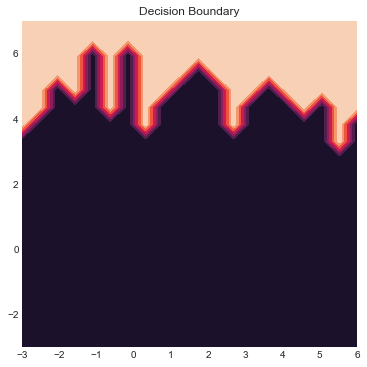

In [37]:
classify = LogisticRegression()
classify.train(Xtrain[:500],Ytrain[:500])

predict = classify.use(Xtest[:400])

print("\n X_test: ",np.unique(Xtest[:400]))
print("\n Y: ",predict)

Yl = np.argmax(predict, 1)
Tl = np.argmax(Ytest[:400], 1)

plt.figure(figsize=(15,5))
plt.plot(np.sort(Tl,0))
plt.plot(np.sort(Yl,0))
plt.show()




x = np.linspace(-3, 6,20)
y = np.linspace(-3, 7,20)
xs, ys = np.meshgrid(x, y)
plt.figure(figsize=(6,6))
plt.contourf(xs, ys, np.sort(Yl.reshape(xs.shape),0))
plt.title("Decision Boundary")

output = [classify.classes[t] for t in Tl]
print("\n Output: ", output)

confusion = classify.confusion_matrix(output,Ytest[:400])
print("\n Confusion Matrix: \n",confusion)

precision = classify.precision(confusion)
print("\n Precision: ",precision)

recall = classify.recall(confusion)
print("\n Recall: ",recall)

specificity = classify.specificity(confusion)
print("\n Specificity: ",specificity)



print("\n Accuracy: ", 100 - np.mean(np.abs(Tl[:400] - Yl)) * 100, "%")


# Extra Credit

In [93]:
#Splitting dataset into 5
df_split = np.array_split(df, 5)

In [99]:
#testing set
X2 = df_split[0].iloc[:,df_split[0].columns != 'injury_num']
T  = df_split[0].iloc[:,df_split[0].columns == 'injury_num']
X2 = X2.values
T  = T.values

Xtest1 = X2
Ytest1 = T

#training set1
X2 = df_split[1].iloc[:,df_split[0].columns != 'injury_num']
T  = df_split[1].iloc[:,df_split[0].columns == 'injury_num']
X2 = X2.values
T  = T.values

Xtrain1 = X2
Ytrain1 = T


#training set2
X2 = df_split[2].iloc[:,df_split[0].columns != 'injury_num']
T  = df_split[2].iloc[:,df_split[0].columns == 'injury_num']
X2 = X2.values
T  = T.values

Xtrain2 = X2
Ytrain2 = T


#training set3
X2 = df_split[3].iloc[:,df_split[0].columns != 'injury_num']
T  = df_split[3].iloc[:,df_split[0].columns == 'injury_num']
X2 = X2.values
T  = T.values

Xtrain3 = X2
Ytrain3 = T

#training set4
X2 = df_split[4].iloc[:,df_split[0].columns != 'injury_num']
T  = df_split[4].iloc[:,df_split[0].columns == 'injury_num']
X2 = X2.values
T  = T.values

Xtrain4 = X2
Ytrain4 = T

In [100]:
classify = LDA()
classify.train(Xtrain1[:500], Ytrain1[:500])
predict = classify.use(Xtest1[:400])


print("\n Training set 1")
output = [classify.classes[t] for t in D]
confusion = classify.confusion_matrix(output,Ytest1[:400])
print("\n Confusion Matrix: \n",confusion)

accuracy = ((confusion[-1][-1] + confusion[1][1])*100)/ (confusion[-1][-1] + confusion[1][1] + confusion[-1][1] + confusion[1][-1]) 
print("\n Accuracy(%): ", accuracy)



 Training set 1

 Confusion Matrix: 
        -1       1
-1      0       0
 1  15600  144400

 Accuracy(%):  90.25


In [101]:
classify = LDA()
classify.train(Xtrain2[:500], Ytrain2[:500])
predict = classify.use(Xtest1[:400])

print("\n Training set 2")
output = [classify.classes[t] for t in D]
confusion = classify.confusion_matrix(output,Ytest1[:400])
print("\n Confusion Matrix: \n",confusion)

accuracy = ((confusion[-1][-1] + confusion[1][1])*100)/ (confusion[-1][-1] + confusion[1][1] + confusion[-1][1] + confusion[1][-1]) 
print("\n Accuracy(%): ", accuracy)


 Training set 2

 Confusion Matrix: 
        -1       1
-1      0       0
 1  15600  144400

 Accuracy(%):  90.25


In [102]:
classify = LDA()
classify.train(Xtrain3[:500], Ytrain3[:500])
predict = classify.use(Xtest1[:400])

print("\n Training set 3")
output = [classify.classes[t] for t in D]
confusion = classify.confusion_matrix(output,Ytest1[:400])
print("\n Confusion Matrix: \n",confusion)

accuracy = ((confusion[-1][-1] + confusion[1][1])*100)/ (confusion[-1][-1] + confusion[1][1] + confusion[-1][1] + confusion[1][-1]) 
print("\n Accuracy(%): ", accuracy)


 Training set 3

 Confusion Matrix: 
        -1       1
-1      0       0
 1  15600  144400

 Accuracy(%):  90.25


In [103]:
classify = LDA()
classify.train(Xtrain4[:500], Ytrain4[:500])
predict = classify.use(Xtest1[:400])

print("\n Training set 4")
output = [classify.classes[t] for t in D]
confusion = classify.confusion_matrix(output,Ytest1[:400])
print("\n Confusion Matrix: \n",confusion)

accuracy = ((confusion[-1][-1] + confusion[1][1])*100)/ (confusion[-1][-1] + confusion[1][1] + confusion[-1][1] + confusion[1][-1]) 
print("\n Accuracy(%): ", accuracy)


 Training set 4

 Confusion Matrix: 
        -1       1
-1      0       0
 1  15600  144400

 Accuracy(%):  90.25


# Observation

    As far as I have observed I am getting the same accuracy when trained with 4 different training sets.

# Evaluation Metrics

    Here for evaluation, I have used Confusion matrix to evaluate the performance metrics of each classification model. From the confusion matrix I have also calculated the precision, recall and specificity for each of the model.
        - Precison is about how often it is correct when it predicts yes. 
        - Recall is the number of TP divided by the number of TP plus the number of FN.
        - Specificity is the number of TN  divided by the number of TN plus the number of FN.

# Model Comparison 
    Pocket   : 83.61 %
    QDA      : 88.71 %
    LDA      : 90.75 %
    Logistic : 74.75 %
      As we can see from the above stats, we could come to a conclusion that LDA model is the best classification model when compared to other classification models. Since I have used lesser training data the inference is LDA is better off. 
    
    

# Conclusions

    In this assignment I have learnt to build classification model based on the four algorithms- Pocket,QDA,LDA,Logistic. According to my analysis the LDA is the best classifier as it has the higher accuracy of all. I have faced challenges in finding the correct independent variables to train the model for good accuracy. I was able to overcome by visualising the correlation matrix to view the correlation coefficient and choose the variables.


# References
    https://stats.stackexchange.com/questions/51200/pocket-algorithm-for-training-perceptrons
    https://classeval.wordpress.com/introduction/basic-evaluation-measures/
    